# 📊 Data Loading & EDA

## Today we're going to predict if a given tweet is related to a disaster or not. 
### It is truly about a disaster, the target value will be 1 and if not, the value will be 0.

### Data Preview

Each sample in the train and test set has the following information:

* The text of a tweet
* A keyword from that tweet (although this may be blank!)
* The location the tweet was sent from (may also be blank)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [ ]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [ ]:
print("Train data shape is:", train.shape)
print("Test data shape is:",test.shape)

In [ ]:
train.head(3)

In [ ]:
test.head(3)

## a) Target Balance Check

### As we can see the table above, a keyword or location column value(in train data) is not essential.

In [ ]:
ax = sns.countplot(x="target", data=train)

### According to the countplot, the target class(0 or 1) is quite equally distributed.
#### Let's see some context that the real disaster tweet shows.

In [ ]:
target_0 = train[train["target"] == 0]["text"]
print(target_0.values[6])

In [ ]:
target_1 = train[train["target"] == 1]["text"]
print(target_1.values[3])

## b) Length of Tweets (Diasaster vs Not Diasaster)

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len= target_1.str.len()
ax1.hist(tweet_len, color='red')
ax1.set_title('Disaster tweets')

tweet_len=target_0.str.len()
ax2.hist(tweet_len,color='blue')
ax2.set_title('Not disaster tweets')

fig.suptitle('Length of tweets')
plt.show()

#### It seems the length of tweets is usually over 120, which means we don't have to care the length to predict a target. 
* Plus, Twitter doubled the character limit from 140 characters to 280 characters at almost all countries except some Asian ones due to particularity of their languages...😥 
* In my opinion... I don't think the length of tweets or the number of words indicates whether the tweet is about disaster or not.. (for example, an individual could tweet a long- detailed info of disasters...)

## c) Location Column - Where did those tweets come from?
### We can sort location column by frequency. I extracted top 10 locations.

In [ ]:
top_location = train['location'].value_counts().reset_index()
top10_location = top_location.iloc[:10]
top10_location

In [ ]:
ax = sns.barplot(x="index", y="location", data=top10_location)
plt.xticks(rotation=45)

### There were a lot of tweets in USA. 
#### Maybe it will be helpful to make another 'continent' column and then draw a map by feature engineering!!

## d) WordCloud

In [ ]:
from wordcloud import WordCloud
word_freq_dic = train[train.target==1].keyword.value_counts().to_dict()

wordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 700, height = 700, random_state = 42).generate_from_frequencies(word_freq_dic)

plt.figure(figsize = (6, 6)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(wordcloud)
plt.title("Word Frequency", size = 13)

plt.axis('off') # 그래프 축 제거

plt.show()

# ✨ Data Preprocessing

### a) CountVectorizer

#### Before we start, let's talk about some vectorizers in scikit-learn.

* DictVectorizer: Making BOW(Bag Of Words) Encoding Vector from the dictionary where frequency of each word exists.

* CountVectorizer: Making word tokens from some set of documents and then BOW(Bag Of Words) Encoding Vector

* TfidfVectorizer: Similar as CountVectorizer, but Weighing Words and then Making BOW(Bag Of Words) Encoding Vector

* HashingVectorizer: Similar as CountVectorizer, but Less Memory & Quick Operation by using Hash Function


In [ ]:
count_vectorizer = feature_extraction.text.CountVectorizer()
example_train_vectors1 = count_vectorizer.fit_transform(train["text"][0:5])
example_train_vectors1

In [ ]:
Tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()

example_train_vectors2 = Tfidf_vectorizer.fit_transform(train["text"][0:5])

In [ ]:
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors1[0].todense().shape)
print(example_train_vectors1[0].todense())

print(example_train_vectors2[0].todense().shape)
print(example_train_vectors2[0].todense())

### We can check some weighs given at vectors when using TfidfVectorizer.

In [ ]:
train_vectors_cv = count_vectorizer.fit_transform(train["text"])
test_vectors_cv = count_vectorizer.transform(test["text"])

In [ ]:
train_vectors_tv = Tfidf_vectorizer.fit_transform(train["text"])
test_vectors_tv = Tfidf_vectorizer.transform(test["text"])

In [ ]:
test_vectors_cv

# ⭐ Modeling

In [ ]:
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors_tv, train["target"], cv=3, scoring="f1")
scores

In [ ]:
clf.fit(train_vectors_tv, train["target"])

In [ ]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission["target"] = clf.predict(test_vectors_tv)
sample_submission.head()

In [ ]:
sample_submission["target"].value_counts()

In [ ]:
sample_submission.to_csv("tfidf-ridge.csv", index=False)

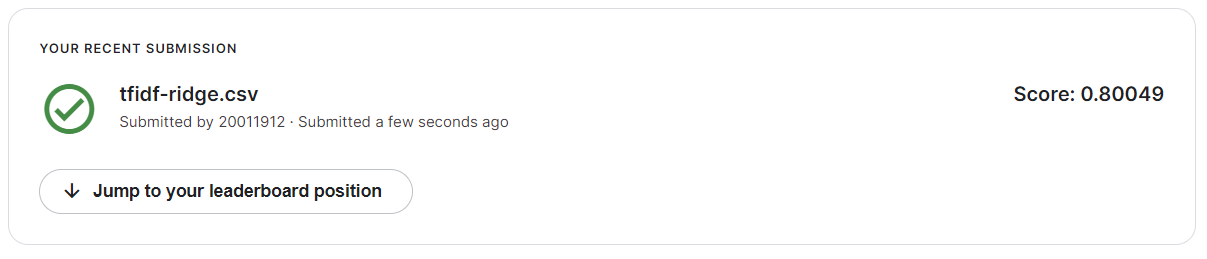